# Importing Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data Loading

In [3]:
TruthFrequencyEvents_df = pd.read_csv('TruthFrequencyEvents.txt',sep='\t', names = ["data"])
FrequencyEvents_df = pd.read_csv('FrequencyEvents.txt',sep='\t', names = ["data"])
TruthBearingEvents_df = pd.read_csv('TruthBearingEvents.txt',sep='\t', names = ["data"])
BearingEvents_df = pd.read_csv('BearingEvents.txt',sep='\t', names = ["data"])
TargetPositions_df = pd.read_csv('TargetPositions.txt',sep='\t', names = ["data"])

# Data Preprocessing

In [4]:
TruthBearingEvents=[]
for _, row in TruthBearingEvents_df.iterrows():
  temp = row["data"].split()
  temp[0] = float(temp[0])
  temp[1] = float(temp[1])
  temp[2] = float(temp[2])
  if not(temp[0]==0 and temp[1]==0 and temp[2]==0):
    TruthBearingEvents.append(temp)

In [5]:
TruthFrequencyEvents=[]
for _, row in TruthFrequencyEvents_df.iterrows():
  temp = row["data"].split()
  temp[0] = float(temp[0])
  temp[1] = float(temp[1])
  if not(temp[0]==0 and temp[1]==0 and temp[2]=='0'):
    TruthFrequencyEvents.append(temp)
# SNR is not converted to float because of missing values

In [6]:
TargetPositions=[]
for _, row in TargetPositions_df.iterrows():
  temp = row["data"].split()
  for i in range(len(temp)):
    temp[i]=float(temp[i])
  TargetPositions.append(temp)

In [7]:
T1TruthBearing = []
T2TruthBearing = []
T3TruthBearing = []
T4TruthBearing = []
OTruthBearing = []
i=0
while i<len(TruthBearingEvents):
  T1TruthBearing.append(TruthBearingEvents[i])
  T2TruthBearing.append(TruthBearingEvents[i+1])
  T3TruthBearing.append(TruthBearingEvents[i+2])
  T4TruthBearing.append(TruthBearingEvents[i+3])
  OTruthBearing.append(TruthBearingEvents[i+4])
  i=i+5

In [8]:
T1TruthFrequency = []
T2TruthFrequency = []
T3TruthFrequency = []
T4TruthFrequency = []
i=0
while i<len(TruthFrequencyEvents):
  T1TruthFrequency.append(TruthFrequencyEvents[i])
  T1TruthFrequency.append(TruthFrequencyEvents[i+1])
  T1TruthFrequency.append(TruthFrequencyEvents[i+2])
  T1TruthFrequency.append(TruthFrequencyEvents[i+3])
  T2TruthFrequency.append(TruthFrequencyEvents[i+4])
  T2TruthFrequency.append(TruthFrequencyEvents[i+5])
  T2TruthFrequency.append(TruthFrequencyEvents[i+6])
  T2TruthFrequency.append(TruthFrequencyEvents[i+7])
  T3TruthFrequency.append(TruthFrequencyEvents[i+8])
  T3TruthFrequency.append(TruthFrequencyEvents[i+9])
  T3TruthFrequency.append(TruthFrequencyEvents[i+10])
  T3TruthFrequency.append(TruthFrequencyEvents[i+11])
  T4TruthFrequency.append(TruthFrequencyEvents[i+12])
  T4TruthFrequency.append(TruthFrequencyEvents[i+13])
  T4TruthFrequency.append(TruthFrequencyEvents[i+14])
  T4TruthFrequency.append(TruthFrequencyEvents[i+15])
  i=i+16

In [9]:
T1Position = []
T2Position = []
T3Position = []
T4Position = []
OPosition = []
for i in range(len(TargetPositions)):
  T1Position.append([TargetPositions[i][0],TargetPositions[i][1],TargetPositions[i][2],TargetPositions[i][3]])
  T2Position.append([TargetPositions[i][0],TargetPositions[i][4],TargetPositions[i][5],TargetPositions[i][6]])
  T3Position.append([TargetPositions[i][0],TargetPositions[i][7],TargetPositions[i][8],TargetPositions[i][9]])
  T4Position.append([TargetPositions[i][0],TargetPositions[i][10],TargetPositions[i][11],TargetPositions[i][12]])
  OPosition.append([TargetPositions[i][0],TargetPositions[i][13],TargetPositions[i][14],TargetPositions[i][15]])

In [10]:
#Replace NaN values in SNR of truth frequency with Mean
t = 0
for i in range(len(T4TruthFrequency)):
  x = (T4TruthFrequency[i][2:3])[0]
  if(x!='-1.#INF'):
    t=t+float(x)
#mean
mean_t = t/len(T4TruthFrequency)
for i in T4TruthFrequency:
  if i[2]!='-1.#INF':
    i[2]=float(i[2])
  else:
    i[2]=mean_t

In [11]:
#Convert remaining Truth Frequency events to float
for i in T1TruthFrequency:
    i[2]=float(i[2])
for i in T2TruthFrequency:
    i[2]=float(i[2])
for i in T3TruthFrequency:
    i[2]=float(i[2])

# Data Exploration

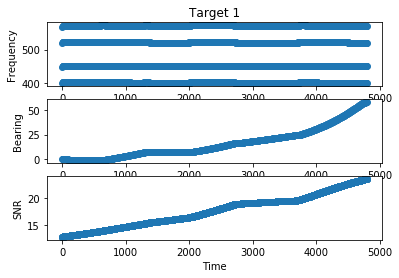

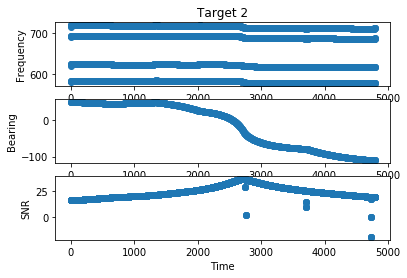

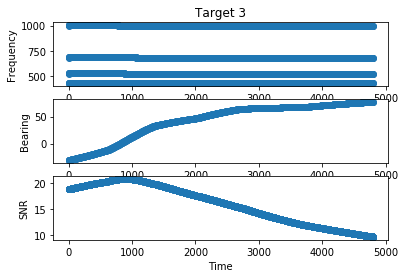

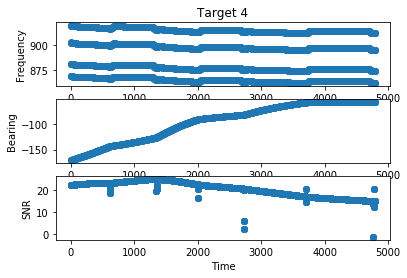

In [12]:
#Truth Frequency, Bearing and SNR of T1
T1TruthFrequency_t=[]
T1TruthFrequency_f=[]
T1TruthFrequency_s=[]
for i in T1TruthFrequency:
    T1TruthFrequency_t.append(i[0])
    T1TruthFrequency_f.append(i[1])
    T1TruthFrequency_s.append(i[2])
T1TruthBearing_t=[]
T1TruthBearing_b=[]
for i in T1TruthBearing:
    T1TruthBearing_t.append(i[0])
    T1TruthBearing_b.append(i[1])
freq_plot = plt.subplot(3,1,1)
freq_plot.set_ylabel('Frequency')
freq_plot.set_title("Target 1")
freq_plot.scatter(T1TruthFrequency_t,T1TruthFrequency_f)
bear_plot = plt.subplot(3,1,2)
bear_plot.set_ylabel('Bearing')
bear_plot.scatter(T1TruthBearing_t,T1TruthBearing_b)
SNR_plot = plt.subplot(3,1,3)
SNR_plot.set_xlabel('Time')
SNR_plot.set_ylabel('SNR')
SNR_plot.scatter(T1TruthFrequency_t,T1TruthFrequency_s)
plt.show()

#Truth Frequency, Bearing and SNR of T2
T2TruthFrequency_t=[]
T2TruthFrequency_f=[]
T2TruthFrequency_s=[]
for i in T2TruthFrequency:
    T2TruthFrequency_t.append(i[0])
    T2TruthFrequency_f.append(i[1])
    T2TruthFrequency_s.append(i[2])
T2TruthBearing_t=[]
T2TruthBearing_b=[]
for i in T2TruthBearing:
    T2TruthBearing_t.append(i[0])
    T2TruthBearing_b.append(i[1])
freq_plot = plt.subplot(3,1,1)
freq_plot.set_ylabel('Frequency')
freq_plot.set_title("Target 2")
freq_plot.scatter(T2TruthFrequency_t,T2TruthFrequency_f)
bear_plot = plt.subplot(3,1,2)
bear_plot.set_ylabel('Bearing')
bear_plot.scatter(T2TruthBearing_t,T2TruthBearing_b)
SNR_plot = plt.subplot(3,1,3)
SNR_plot.set_xlabel('Time')
SNR_plot.set_ylabel('SNR')
SNR_plot.scatter(T2TruthFrequency_t,T2TruthFrequency_s)
plt.show()

#Truth Frequency, Bearing and SNR of T3
T3TruthFrequency_t=[]
T3TruthFrequency_f=[]
T3TruthFrequency_s=[]
for i in T3TruthFrequency:
    T3TruthFrequency_t.append(i[0])
    T3TruthFrequency_f.append(i[1])
    T3TruthFrequency_s.append(i[2])
T3TruthBearing_t=[]
T3TruthBearing_b=[]
for i in T3TruthBearing:
    T3TruthBearing_t.append(i[0])
    T3TruthBearing_b.append(i[1])
freq_plot = plt.subplot(3,1,1)
freq_plot.set_ylabel('Frequency')
freq_plot.set_title("Target 3")
freq_plot.scatter(T3TruthFrequency_t,T3TruthFrequency_f)
bear_plot = plt.subplot(3,1,2)
bear_plot.set_ylabel('Bearing')
bear_plot.scatter(T3TruthBearing_t,T3TruthBearing_b)
SNR_plot = plt.subplot(3,1,3)
SNR_plot.set_xlabel('Time')
SNR_plot.set_ylabel('SNR')
SNR_plot.scatter(T3TruthFrequency_t,T3TruthFrequency_s)
plt.show()

#Truth Frequency, Bearing and SNR of T4
T4TruthFrequency_t=[]
T4TruthFrequency_f=[]
T4TruthFrequency_s=[]
for i in T4TruthFrequency:
    T4TruthFrequency_t.append(i[0])
    T4TruthFrequency_f.append(i[1])
    T4TruthFrequency_s.append(i[2])
T4TruthBearing_t=[]
T4TruthBearing_b=[]
for i in T4TruthBearing:
    T4TruthBearing_t.append(i[0])
    T4TruthBearing_b.append(i[1])
freq_plot = plt.subplot(3,1,1)
freq_plot.set_ylabel('Frequency')
freq_plot.set_title("Target 4")
freq_plot.scatter(T4TruthFrequency_t,T4TruthFrequency_f)
bear_plot = plt.subplot(3,1,2)
bear_plot.set_ylabel('Bearing')
bear_plot.scatter(T4TruthBearing_t,T4TruthBearing_b)
SNR_plot = plt.subplot(3,1,3)
SNR_plot.set_xlabel('Time')
SNR_plot.set_ylabel('SNR')
SNR_plot.scatter(T4TruthFrequency_t,T4TruthFrequency_s)
plt.show()

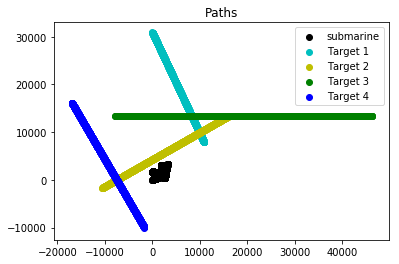

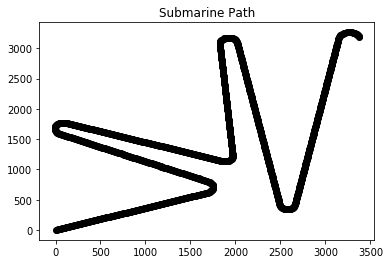

In [13]:
#Paths
T1Position_x = []
T1Position_y = []
for i in T1Position:
    T1Position_x.append(i[1])
    T1Position_y.append(i[2])
T2Position_x = []
T2Position_y = []
for i in T2Position:
    T2Position_x.append(i[1])
    T2Position_y.append(i[2])
T3Position_x = []
T3Position_y = []
for i in T3Position:
    T3Position_x.append(i[1])
    T3Position_y.append(i[2])
T4Position_x = []
T4Position_y = []
for i in T4Position:
    T4Position_x.append(i[1])
    T4Position_y.append(i[2])
OPosition_x = []
OPosition_y = []
for i in OPosition:
    OPosition_x.append(i[1])
    OPosition_y.append(i[2])
plt.scatter(OPosition_x,OPosition_y,color='k',label='submarine')
plt.scatter(T1Position_x,T1Position_y,color='c',label='Target 1')
plt.scatter(T2Position_x,T2Position_y,color='y',label='Target 2')
plt.scatter(T3Position_x,T3Position_y,color='g',label='Target 3')
plt.scatter(T4Position_x,T4Position_y,color='b',label='Target 4')
plt.legend()
plt.title("Paths")
plt.show()

#Path of Submarine
plt.scatter(OPosition_x,OPosition_y,color='k',label='submarine')
plt.title("Submarine Path")
plt.show()

# ANN

### ANN for Target 1

In [45]:
X = []
y = []
for i in range(len(T1Position)):
    temp = []
    #temp.append(T1TruthBearing[i][1])
    #temp.append(T1TruthBearing[i][2])
    i4=4*i
    temp.append(T1TruthFrequency[i4][1])
    temp.append(T1TruthFrequency[i4][2])
    temp.append(T1TruthFrequency[i4+1][1])
    temp.append(T1TruthFrequency[i4+1][2])
    temp.append(T1TruthFrequency[i4+2][1])
    temp.append(T1TruthFrequency[i4+2][2])
    temp.append(T1TruthFrequency[i4+3][1])
    temp.append(T1TruthFrequency[i4+3][2])
    temp.append(OPosition[i][1])
    temp.append(OPosition[i][2])
    X.append(temp)
    temp = []
    temp.append(T1Position[i][1])
    temp.append(T1Position[i][2])
    y.append(temp)

In [46]:
#Train test split
import sklearn
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.33,random_state=5)

In [48]:
# Feature scaling
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [49]:
#Linear Regression
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(X_train,y_train)
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
acc = mean_squared_error(y_test, y_pred)
print(acc)

221283.81773953617


In [50]:
#ANN
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(hidden_layer_sizes=(50,100),solver='lbfgs').fit(X_train,y_train)
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
acc = mean_squared_error(y_test, y_pred)
print(acc)

6987.541233472386


In [51]:
y_test_x = []
y_test_y = []
y_pred_x = []
y_pred_y = []
for i in range(len(y_test)):
    y_test_x.append(y_test[i][0])
    y_test_y.append(y_test[i][1])
    y_pred_x.append(y_pred[i][0])
    y_pred_y.append(y_pred[i][1])

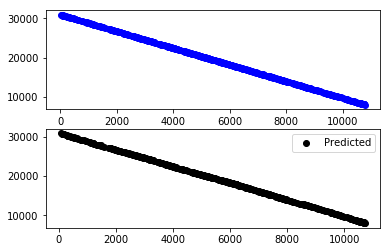

In [52]:
plt.subplot(2,1,1).scatter(y_test_x,y_test_y,color='b',label='Original')
plt.subplot(2,1,2).scatter(y_pred_x,y_pred_y,color='k',label='Predicted')
plt.legend()
plt.show()

### ANN for Target 2

In [77]:
X = []
y = []
for i in range(len(T2Position)):
    temp = []
    temp.append(T2TruthBearing[i][1])
    temp.append(T2TruthBearing[i][2])
    i4=4*i
    temp.append(T2TruthFrequency[i4][1])
    temp.append(T2TruthFrequency[i4][2])
    temp.append(T2TruthFrequency[i4+1][1])
    temp.append(T2TruthFrequency[i4+1][2])
    temp.append(T2TruthFrequency[i4+2][1])
    temp.append(T2TruthFrequency[i4+2][2])
    temp.append(T2TruthFrequency[i4+3][1])
    temp.append(T2TruthFrequency[i4+3][2])
    temp.append(OPosition[i][1])
    temp.append(OPosition[i][2])
    X.append(temp)
    temp = []
    temp.append(T2Position[i][1])
    temp.append(T2Position[i][2])
    y.append(temp)

In [78]:
#Train test split
import sklearn
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.33,random_state=5)

In [79]:
# Feature scaling
from sklearn import preprocessing
#scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [80]:
#Linear Regression
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(X_train,y_train)
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
acc = mean_squared_error(y_test, y_pred)
print(acc)

2498867.82822174


In [81]:
#ANN
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(hidden_layer_sizes=(50,100),solver='lbfgs').fit(X_train,y_train)
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
acc = mean_squared_error(y_test, y_pred)
print(acc)

276287.30415893375


In [82]:
y_test_x = []
y_test_y = []
y_pred_x = []
y_pred_y = []
for i in range(len(y_test)):
    y_test_x.append(y_test[i][0])
    y_test_y.append(y_test[i][1])
    y_pred_x.append(y_pred[i][0])
    y_pred_y.append(y_pred[i][1])

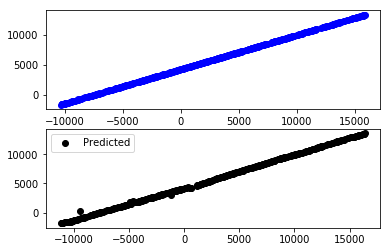

In [83]:
plt.subplot(2,1,1).scatter(y_test_x,y_test_y,color='b',label='Original')
plt.subplot(2,1,2).scatter(y_pred_x,y_pred_y,color='k',label='Predicted')
plt.legend()
plt.show()

### ANN for Target 3

In [84]:
X = []
y = []
for i in range(len(T3Position)):
    temp = []
    #temp.append(T3TruthBearing[i][1])
    #temp.append(T3TruthBearing[i][2])
    i4=4*i
    temp.append(T3TruthFrequency[i4][1])
    #temp.append(T3TruthFrequency[i4][2])
    temp.append(T3TruthFrequency[i4+1][1])
    #temp.append(T3TruthFrequency[i4+1][2])
    temp.append(T3TruthFrequency[i4+2][1])
    #temp.append(T3TruthFrequency[i4+2][2])
    temp.append(T3TruthFrequency[i4+3][1])
    #temp.append(T3TruthFrequency[i4+3][2])
    temp.append(OPosition[i][1])
    temp.append(OPosition[i][2])
    X.append(temp)
    temp = []
    temp.append(T3Position[i][1])
    temp.append(T3Position[i][2])
    y.append(temp)

In [85]:
#Train test split
import sklearn
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.33,random_state=5)

In [86]:
# Feature scaling
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [87]:
#Linear Regression
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(X_train,y_train)
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
acc = mean_squared_error(y_test, y_pred)
print(acc)

9407741.183822878


In [88]:
#ANN
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(hidden_layer_sizes=(500),solver='lbfgs').fit(X_train,y_train)
#clf = MLPRegressor(hidden_layer_sizes=(20,20),solver='adam',max_iter=5000).fit(X_train,y_train)
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
acc = mean_squared_error(y_test, y_pred)
print(acc)

354243.8830927009


In [89]:
y_test_x = []
y_test_y = []
y_pred_x = []
y_pred_y = []
for i in range(len(y_test)):
    y_test_x.append(y_test[i][0])
    y_test_y.append(y_test[i][1])
    y_pred_x.append(y_pred[i][0])
    y_pred_y.append(y_pred[i][1])

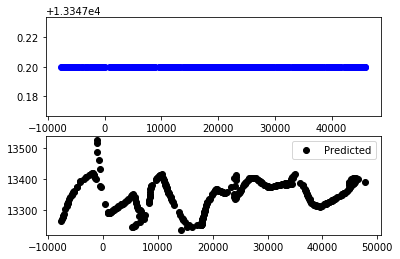

In [90]:
plt.subplot(2,1,1).scatter(y_test_x,y_test_y,color='b',label='Original')
plt.subplot(2,1,2).scatter(y_pred_x,y_pred_y,color='k',label='Predicted')
plt.legend()
plt.show()

### ANN for Target 4

In [91]:
X = []
y = []
for i in range(len(T4Position)):
    temp = []
    temp.append(T4TruthBearing[i][1])
    temp.append(T4TruthBearing[i][2])
    i4=4*i
    temp.append(T4TruthFrequency[i4][1])
    temp.append(T4TruthFrequency[i4][2])
    temp.append(T4TruthFrequency[i4+1][1])
    temp.append(T4TruthFrequency[i4+1][2])
    temp.append(T4TruthFrequency[i4+2][1])
    temp.append(T4TruthFrequency[i4+2][2])
    temp.append(T4TruthFrequency[i4+3][1])
    temp.append(T4TruthFrequency[i4+3][2])
    temp.append(OPosition[i][1])
    temp.append(OPosition[i][2])
    X.append(temp)
    temp = []
    temp.append(T4Position[i][1])
    temp.append(T4Position[i][2])
    y.append(temp)

In [92]:
#Train test split
import sklearn
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.33,random_state=5)

In [93]:
# Feature scaling
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [94]:
#ANN
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(hidden_layer_sizes=(50,100),solver='lbfgs').fit(X_train,y_train)
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
acc = mean_squared_error(y_test, y_pred)
print(acc)

393247.27490049816


In [95]:
y_test_x = []
y_test_y = []
y_pred_x = []
y_pred_y = []
for i in range(len(y_test)):
    y_test_x.append(y_test[i][0])
    y_test_y.append(y_test[i][1])
    y_pred_x.append(y_pred[i][0])
    y_pred_y.append(y_pred[i][1])

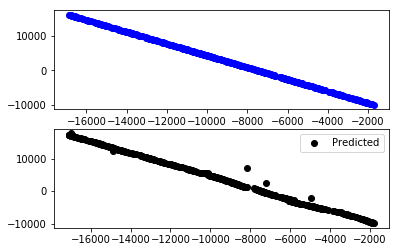

In [96]:
plt.subplot(2,1,1).scatter(y_test_x,y_test_y,color='b',label='Original')
plt.subplot(2,1,2).scatter(y_pred_x,y_pred_y,color='k',label='Predicted')
plt.legend()
plt.show()